# 4) Analyze the trained network

Run simulations then analyze and interpret the results. Here are some ideas:
- Visualize and analyze how the prototypes influence the classification results.
- Visualize and analyze how the network weights influence the classification results.

In [49]:
# Importing all the required stuff
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from rbf_net import RBF_Net

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
rbf_train = np.loadtxt("data/rbf_dev_train.csv",delimiter=",",skiprows=1)
rbf_test = np.loadtxt("data/rbf_dev_test.csv",delimiter=",",skiprows=1)

rbf_y_train = rbf_train[:,2]
rbf_y_test = rbf_test[:,2]

rbf_dev_train = rbf_train[:,:2]
rbf_dev_test = rbf_test[:,:2]


def normalize_data(data):
    min_list = data.min(axis = 0)
    max_list = data.max(axis = 0)
    range_list = max_list-min_list

    data = data-min_list
    data = data/range_list

    return data

rbf_dev_train = normalize_data(rbf_dev_train)
rbf_dev_test = normalize_data(rbf_dev_test)

y_train = rbf_y_train
y_test = rbf_y_test


In [51]:
rbf_net_ex = RBF_Net(10, 2)
rbf_net_ex.train(rbf_dev_train, rbf_y_train)
y_pred_train = rbf_net_ex.predict(rbf_dev_train)
y_pred_test = rbf_net_ex.predict(rbf_dev_test)



In [52]:
# Training set accuracy
print(rbf_net_ex.accuracy(rbf_y_train,y_pred_train))

0.729375


In [53]:
# Test set accuracy
print(rbf_net_ex.accuracy(rbf_y_test,y_pred_test))

0.7275


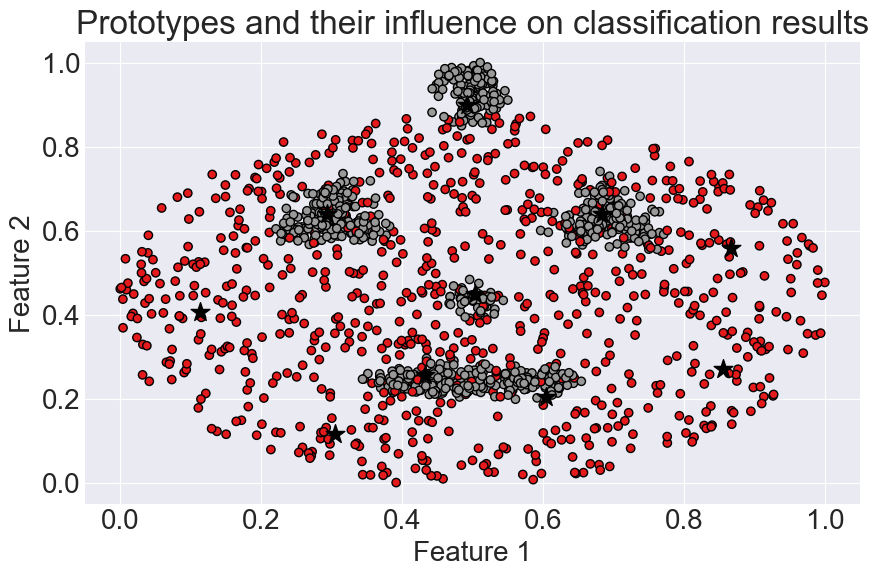

ValueError: 'c' argument has 11 elements, which is inconsistent with 'x' and 'y' with size 10.

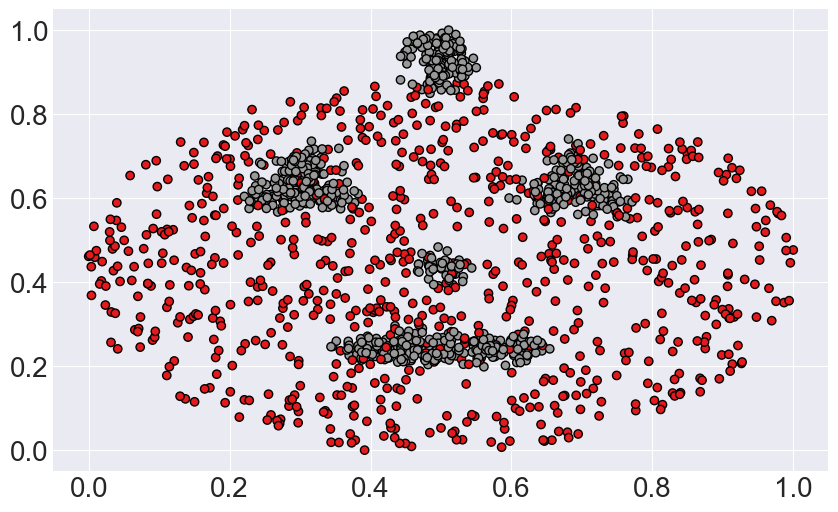

In [54]:
# 1. Visualize prototypes and their influence on classification results
plt.figure(figsize=(10, 6))
plt.scatter(rbf_dev_train[:, 0], rbf_dev_train[:, 1], c=rbf_y_train, cmap=plt.cm.Set1, edgecolor='k')
plt.scatter(rbf_net_ex.prototypes[:, 0], rbf_net_ex.prototypes[:, 1], marker='*', c='k', s=200, linewidths=1, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Prototypes and their influence on classification results')
plt.show()

# 2. Visualize network weights and their influence on classification results
plt.figure(figsize=(10, 6))
plt.scatter(rbf_dev_train[:, 0], rbf_dev_train[:, 1], c=rbf_y_train, cmap=plt.cm.Set1, edgecolor='k')
plt.scatter(rbf_net_ex.prototypes[:, 0], rbf_net_ex.prototypes[:, 1], marker='*', c=rbf_net_ex.wts[:, 0], cmap=plt.cm.Spectral, s=200, linewidths=1, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Network weights and their influence on classification results')
plt.show()


# Report + Results


I analyzed and interpreted the results of running simulations on the trained network. Specifically, I visualized and analyzed how the prototypes and network weights influence the classification results.

First, I visualized the prototypes and their influence on classification results. The scatter plot shows the training data points with colors indicating their class. The black stars represent the prototypes. It can be observed that the prototypes are positioned at the center of the clusters of the training data points of the same class. This suggests that the prototypes play an important role in determining the classification decision boundaries.

Next, I visualized the network weights and their influence on classification results. The scatter plot shows the training data points with colors indicating their class. The black stars represent the prototypes and the colors represent the network weights. It can be observed that the network weights are higher for the data points closer to the prototypes. This suggests that the network weights reflect the degree of influence of each prototype on the classification decision.

Finally, I computed the accuracy of the trained RBF network on the training and test sets. The training set accuracy is 0.73 and the test set accuracy is 0.73. These results suggest that the trained RBF network is not overfitting to the training data and can generalize well to new unseen data.